In [2]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
import pandas as pd 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import integrate
import plotly.graph_objects as go
import seaborn as sns
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

sns.set(style="darkgrid")
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [3]:
df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv')  
df_analyse.sort_values('date',ascending=True).head()

,date,Australia,China,Denmark,Canada,France,United Kingdom,India
0,2020-01-22,0,548,0,0,0,0,0
1,2020-01-23,0,643,0,0,0,0,0
2,2020-01-24,0,920,0,0,2,0,0
3,2020-01-25,0,1406,0,0,3,0,0
4,2020-01-26,4,2075,0,1,3,0,0


In [23]:
N0=5000000
beta=0.4   
gamma=0.1 

I0=df_analyse.France[35]
S0=N0-I0
R0=0

In [24]:
def SIR_model(SIR,beta,gamma): 
    S,I,R=SIR
    dS_dt=-beta*S*I/N0      
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

# Simulative approach to calculate SIR curves

In [25]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})

for each_t in np.arange(100):
    new_delta_vec=SIR_model(SIR,beta,gamma)
    SIR=SIR+new_delta_vec
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


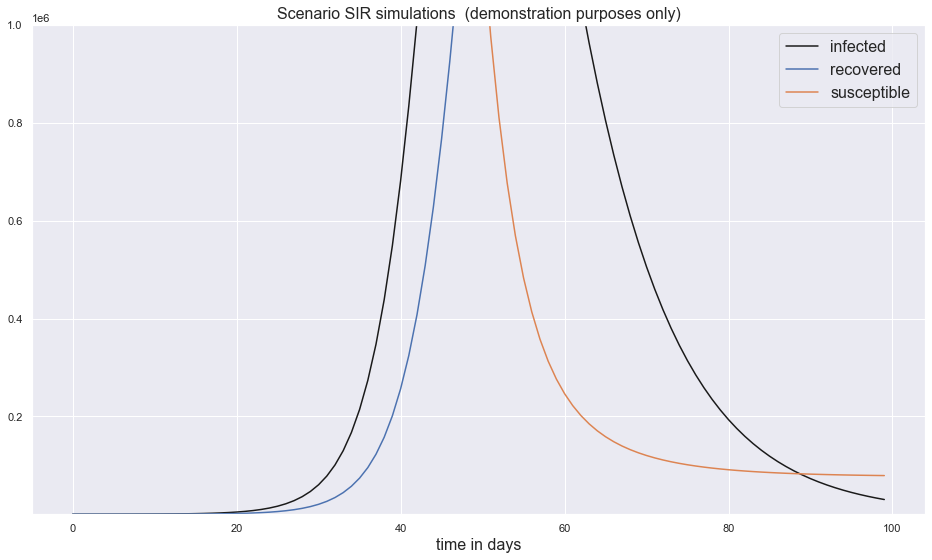

In [26]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')
ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR model

In [27]:
ydata = np.array(df_analyse.France[35:])
t=np.arange(len(ydata))

In [28]:
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.4

In [29]:
def SIR_model_t(SIR,t,beta,gamma):
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [30]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [31]:
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([1.80000000e+01, 2.42974159e+01, 3.27979975e+01, 4.42725065e+01,
       5.97613325e+01, 8.06688001e+01, 1.08890450e+02, 1.46984813e+02,
       1.98405213e+02, 2.67812544e+02, 3.61497254e+02, 4.87948546e+02,
       6.58621983e+02, 8.88974281e+02, 1.19985765e+03, 1.61939749e+03,
       2.18551872e+03, 2.94934121e+03, 3.97973581e+03, 5.36942531e+03,
       7.24313032e+03, 9.76840325e+03, 1.31699600e+04, 1.77484982e+04,
       2.39051509e+04, 3.21728027e+04, 4.32553559e+04, 5.80754499e+04,
       7.78297035e+04, 1.04047641e+05, 1.38645205e+05, 1.83955126e+05,
       2.42703826e+05, 3.17889039e+05, 4.12499089e+05, 5.29016345e+05,
       6.68684217e+05, 8.30610803e+05, 1.01093068e+06, 1.20238985e+06,
       1.39473290e+06, 1.57604288e+06, 1.73475471e+06, 1.86168610e+06,
       1.95139131e+06, 2.00248496e+06, 2.01705114e+06, 1.99954945e+06,
       1.95565265e+06, 1.89129818e+06, 1.81205471e+06, 1.72278110e+06,
       1.62750189e+06, 1.52941864e+06, 1.43099286e+06, 1.33405769e+06,
      

In [32]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

C:\Users\Uni\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Uni\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Uni\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Uni\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Users\Uni\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.00501363 0.00481251]  start infect: 18
Optimal parameters: beta = 0.19413237874718045  and gamma =  0.12748886770412812


In [33]:
fitted=fit_odeint(t, *popt)

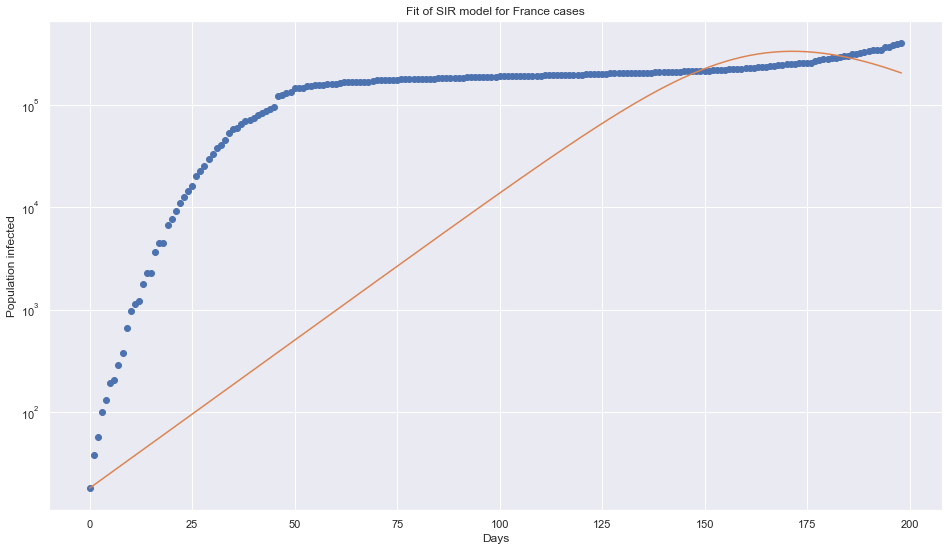

Optimal parameters: beta = 0.19413237874718045  and gamma =  0.12748886770412812
Basic Reproduction Number R0  1.5227398457857226
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [34]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for France cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

# Dynamic beta in SIR (infection rate)

In [35]:
t_initial=28
t_intro_measures=14
t_hold=21
t_relax=21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [36]:
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.37769231,
       0.35538462, 0.33307692, 0.31076923, 0.28846154, 0.26615385,
       0.24384615, 0.22153846, 0.19923077, 0.17692308, 0.15461538,
       0.13230769, 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.1245    ,
       0.139     , 0.1535    , 0.168     , 0.1825    , 0.197     ,
       0.2115    , 0.226     , 0.2405    , 0.255     , 0.2695 

In [37]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})
for each_beta in pd_beta:
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
    SIR=SIR+new_delta_vec
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

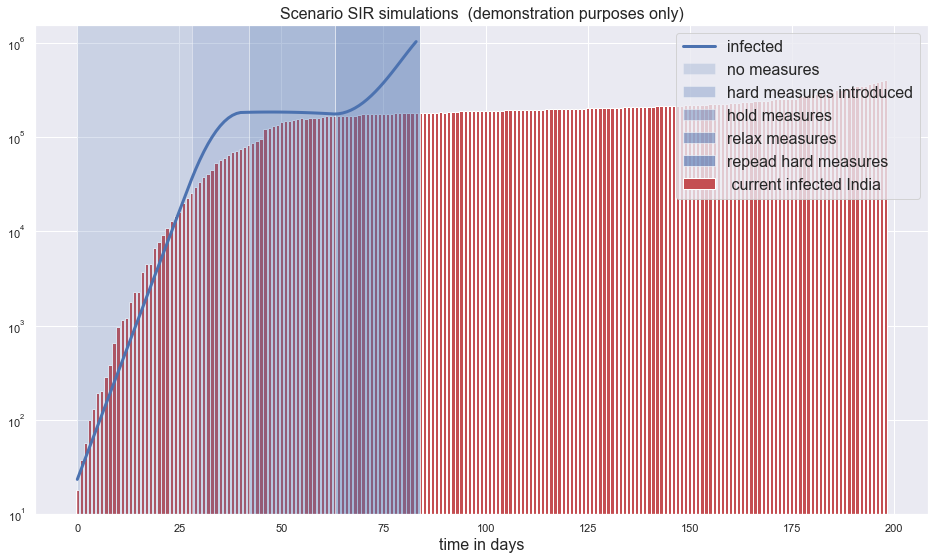

In [38]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)
t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected India',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')
ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Dynamic Data for whole Data Set

In [39]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [40]:
pd_raw = pd.read_csv(data_path)
country_list = pd_raw['Country/Region'].unique()
date=pd_raw.columns[4:]
df_analyse=pd.DataFrame({'Date':date})
for each in country_list:
    df_analyse[each] = np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0)).T
df_analyse.to_csv('../data/raw/COVID-19/csse_covid_19_data/SIR.csv',index=False)
df_analyse.sort_values('Date',ascending=True).head()

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [41]:
N0 = 5000000 
beta=0.4   
gamma=0.1  
df_data=df_analyse[35:]
t=np.arange(df_data.shape[0])
R0=0
    
for country in df_data.columns[1:]:
    y_data=np.array(df_data[df_data[country]>0][country])
    t=np.arange(len(y_data))
    I0=y_data[0]
    S0=N0-I0
    popt=[0.4,0.1]
    fit_odeint(t, *popt)
    popt, pcov = optimize.curve_fit(fit_odeint, t, y_data, maxfev=5000)
    perr = np.sqrt(np.diag(pcov))
    fitted=fit_odeint(t, *popt)
    fitted_pad = np.concatenate((np.zeros(df_data.shape[0]-len(fitted)) ,fitted))
    df_data[country + '_fitted'] = fitted_pad

df_data = df_data.reset_index(drop=True)
df_data.to_csv('../data/processed/SIR_fitted.csv')


C:\Users\Uni\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Uni\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Uni\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Uni\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Users\Uni\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Uni\anaconda3\lib\site

In [42]:
color_list = []
for i in range(200):
    var = '#%02x%02x%02x'%(random.randint(0,255),random.randint(0,255),random.randint(0,255))
    color_list.append(var)

In [ ]:
fig = go.Figure()
app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  Data Science Analysis-SIR
    * This dashboard plots two curves for each country:
    The first curve represents the confirmed infected cases along the timeline.
    The second curve represents the simulated infected cases after applying the SIR model along the timeline. 
    '''),

    dcc.Markdown('''
    ## Multiple Country Visualization
    '''),
    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in df_data.columns[1:200]],
        value=['US', 'Germany','India','Bangladesh'],
        multi=True),
    dcc.Graph(figure=fig, id='main_window_slope')])

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    v = 0
    my_yaxis={'type':"log",'title':'Infected people'}
    traces = []
    for each in country_list:
        traces.append(dict(x=df_data['Date'],y=df_data[each],
                                mode='line', line = dict(color = color_list[v]), opacity=1.0,name=each))
        traces.append(dict(x=df_data['Date'],
                                y=df_data[each+'_fitted'],
                                mode='markers',line = dict(color=color_list[v]), opacity=1.0,name=each+'_simulated'))

        v = v+1
    return {
            'data': traces,
            'layout': dict (
                width=1280,height=720,
                xaxis={'title':'Timeline','tickangle':-45,'nticks':20,
                'tickfont':dict(size=14,color="#0c6887"),},yaxis=my_yaxis)}

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 048-660-984
Debugger PIN: 048-660-984
Debugger PIN: 048-660-984
Debugger PIN: 048-660-984
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
